In [ ]:
#Quick cell to make jupyter notebook use the full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#Some plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
from bokeh.plotting import show, save, output_notebook, output_file
from bokeh.resources import INLINE 
output_notebook(resources=INLINE)

In [ ]:
import umap
import umap.plot
import numpy as np

In [ ]:
from src.data import Dataset
from src import workflow, paths

## Grab the data we want to analyze

In [ ]:
# Grab the processed dataset
workflow.available_datasets()

In [ ]:
ds = Dataset.load('beer_style')

In [ ]:
ds.DESCR

In [ ]:
beer_style = ds.data
beer_style.head()

## Embed the data

Now we reduce the dimension of this data.

As you get more and more points I'd recommend increasing the `n_neighbors` parameter to compensate.  Thing of this as a resolution parameter.

`n_components` controls the dimension you will be embedding your data into (2-dimensions for easy visualization).  Feel free to embed into higher dimensions for clustering if you'd like.

`unique=True` says that if you have two identical points you want to map them to the exact same co-ordinates in your low space.  This becomes especially important if you have more exact dupes that your `n_neighbors` parameter.  That is the problem case where exact dupes can be pushed into very different regions of your space.

In [ ]:
# Select down to the numeric columns we want to embed and analyze
numeric_columns = 'aroma appearance palate taste'.split()
style_by_reviews = beer_style[numeric_columns]

In [ ]:
style_by_reviews_model = umap.UMAP(n_neighbors=8, n_components=2, metric='l1',
                                   unique=False, random_state=42).fit(style_by_reviews)

### It would be interesting we saw a relationship in our plot with groups of similar coloured beers.

Unfortunately, we don't.

In [ ]:
path_to_figures = paths['project_path'] / 'reports' / 'figures'
srm_root_filename = 'beer_styles_by_L1_review_distance_srm'
srm_outfile_png = path_to_figures / (srm_root_filename + '.png')

In [ ]:
color_key = {x:x for x in np.unique(beer_style.srm_rgb)}

In [ ]:
umap_plot = umap.plot.points(style_by_reviews_model, color_key=color_key,
                             color_key_cmap=None, theme='fire',
                             show_legend=False,
                             labels=beer_style.srm_rgb);
umap_plot.figure.savefig(srm_outfile_png, dpi=200, bbox_inches='tight')

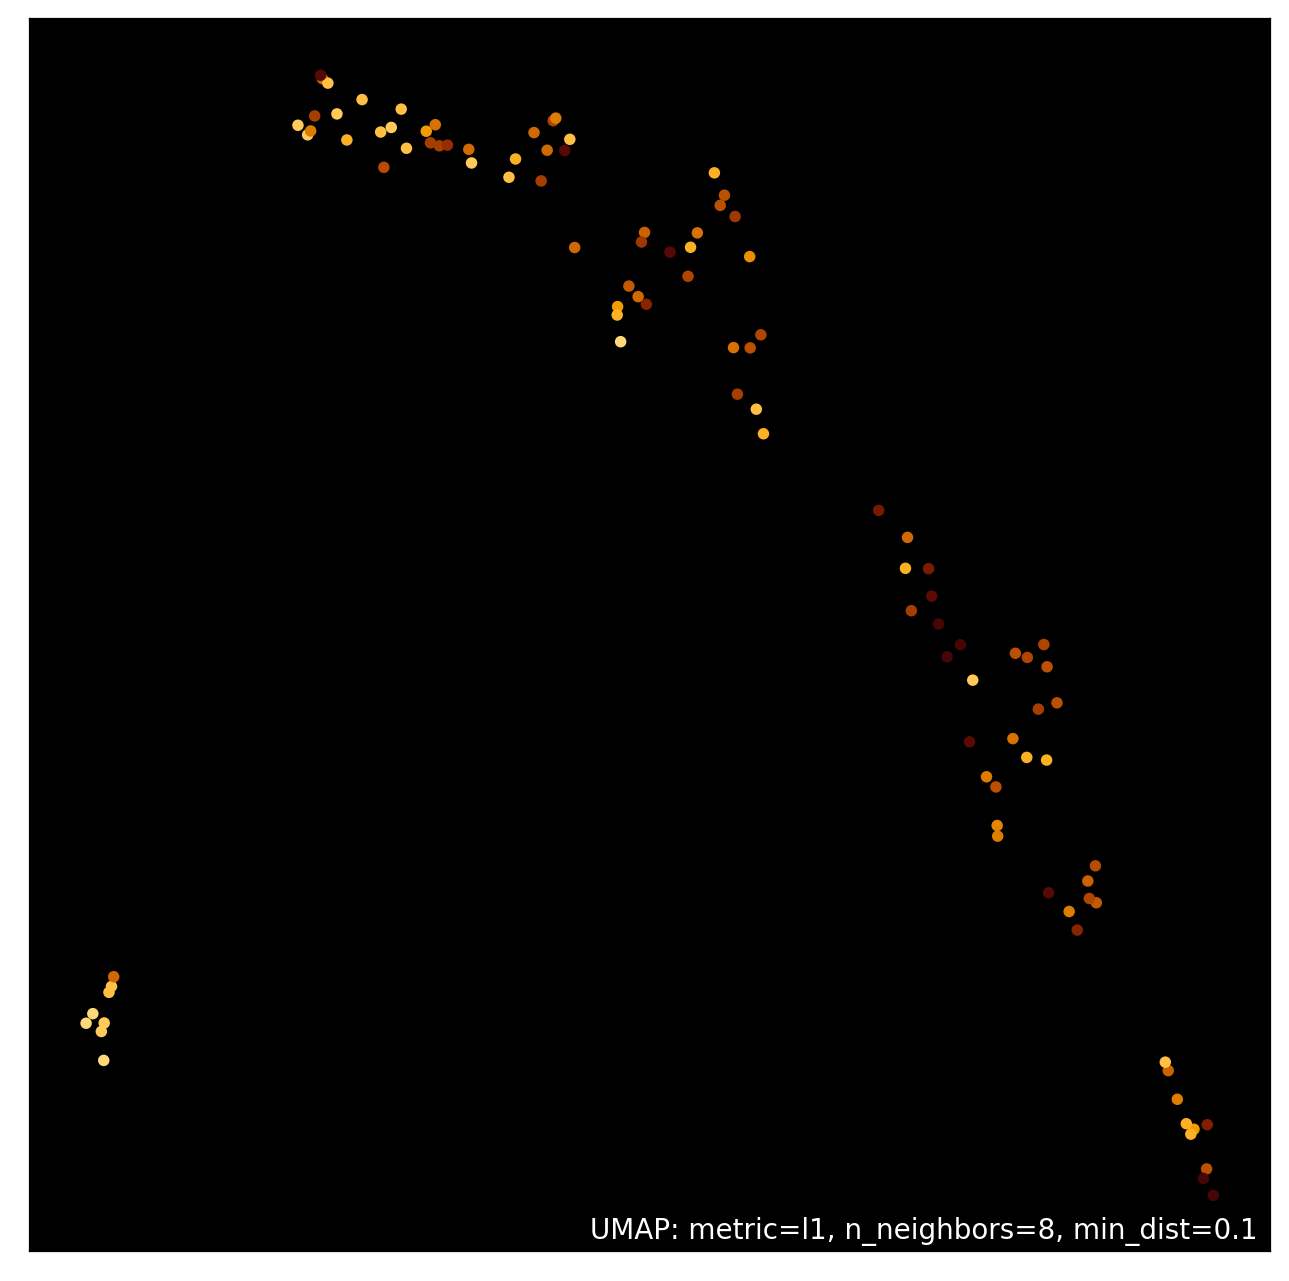

On the other hand this is essentially a single dimensional manifold that we've learned.  It's torn, but that's because there is a big jump in ratings between that bottom left clump and the tail of the main manifold (at the top left). Coloring by overall ranking (not used in our embedding) allows us to see that this is the structure we have learned. 

Since this is such a simple relationship this could have been discovered in a number of ways.  For example our 4 variables turn out to be fairly highly correlated with the overall score.  Visualization and embedding really comes into its own when examining more complex datasets. 

In [ ]:
root_filename = 'beer_styles_by_L1_review_distance_overall'
outfile_png = path_to_figures / (root_filename + '.png')
outfile_html = path_to_figures / (root_filename + '.html')

In [ ]:
umap_plot = umap.plot.points(style_by_reviews_model,
                             labels=beer_style.overall,
                             show_legend=False,
                             theme='fire');
#umap_plot.figure.savefig(outfile_png, dpi=200, bbox_inches='tight')

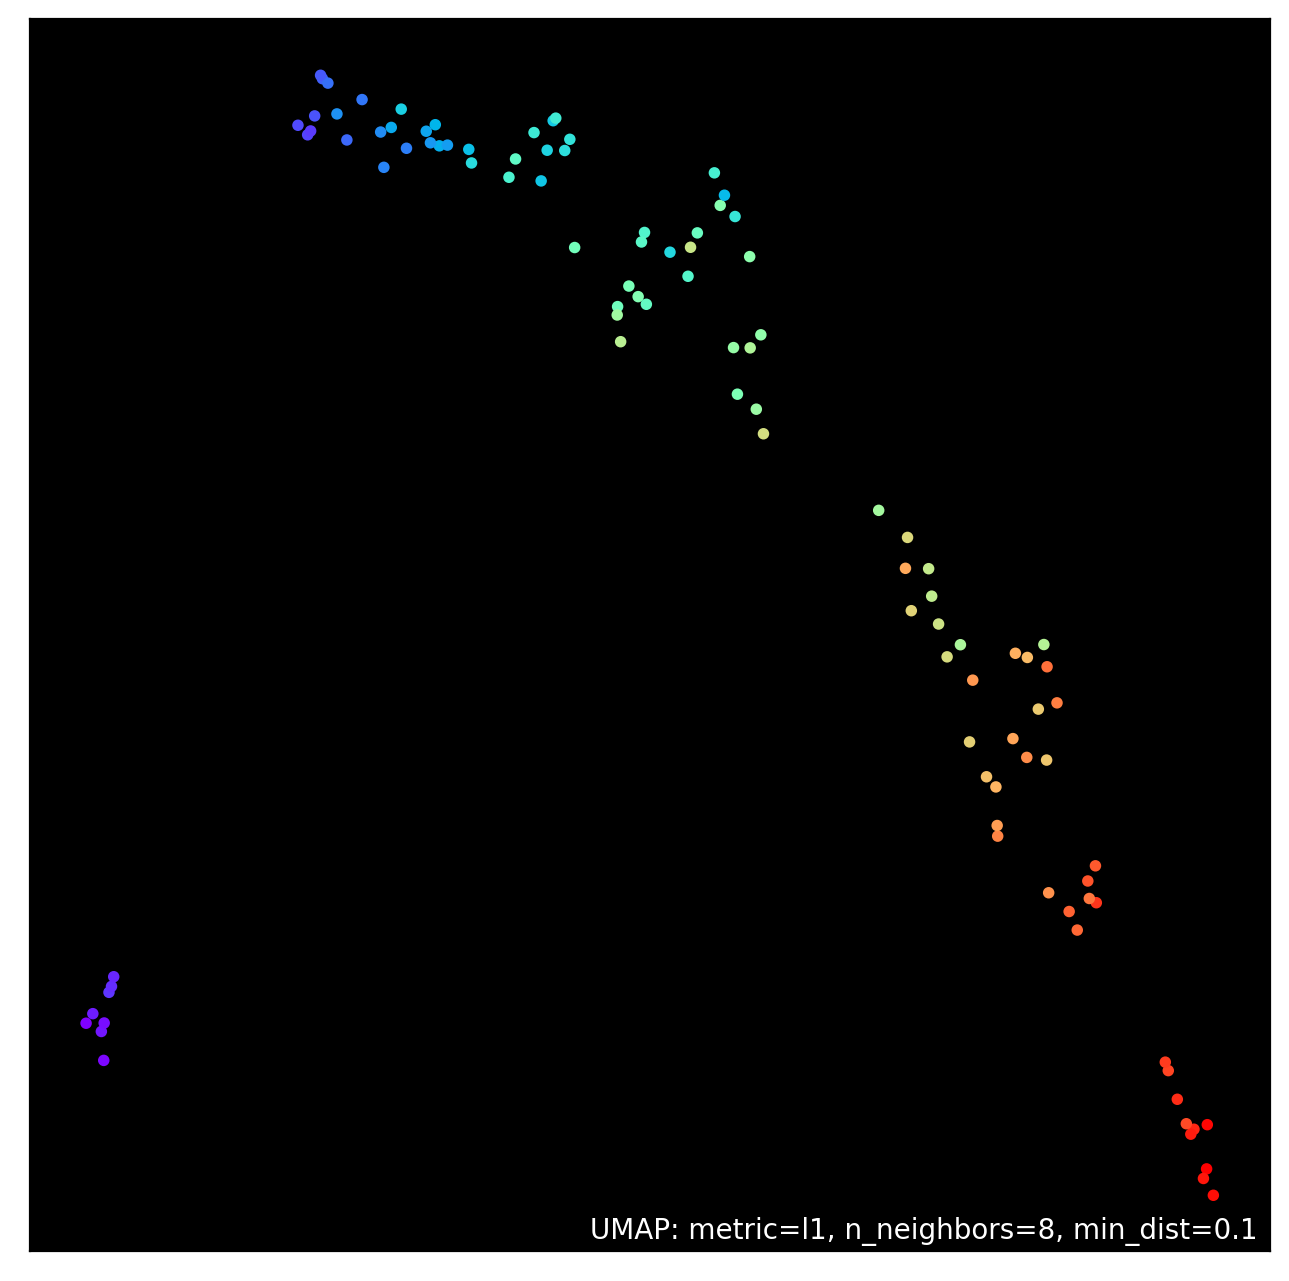

... and now for an interactive plot with mouseover.

In [ ]:
hover_df = beer_style[['style_category','beer_style','abv', 'srm_mid', 'overall']]
f = umap.plot.interactive(style_by_reviews_model,
                          #color_key=beer_style.srm_rgb, labels=beer_style.srm_rgb, 
                          labels=beer_style.overall,
                          hover_data=hover_df, theme='fire', point_size=10);
#save(f, filename=outfile_html)
show(f)